https://colab.research.google.com/drive/1yy4ZwwRmwUMcj0qbT4JLRabQW7GilY7B#scrollTo=tggRfJrqbiQ7

In [7]:
import matplotlib.pyplot as plt
import os, random, pathlib, warnings, itertools, math
from time import sleep
from PIL import Image 
from PIL import ImageEnhance
import numpy as np

# <span style="color:blue"><b>1. Loading the dataset</b></span>
<hr>
<h2> Let's define the path to base directories used in the project </h2>

In [2]:
dataset='Vegetable_Images'

train_folder = os.path.join(dataset,"train")
test_folder = os.path.join(dataset,"validation")
validation_folder = os.path.join(dataset,"test")

<h2>Counting number of images in a folder. (test set in our case)</h2>

In [3]:
def count_files(rootdir):
    '''counts the number of files in each subfolder in a directory'''
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files in " + \
            str(path.name))
        sleep(1)
 
count_files(os.path.join(test_folder))

There are 200 files in Bean
There are 200 files in Bitter_Gourd
There are 200 files in Bottle_Gourd
There are 200 files in Brinjal
There are 200 files in Broccoli
There are 200 files in Cabbage
There are 200 files in Capsicum
There are 200 files in Carrot
There are 200 files in Cauliflower
There are 200 files in Cucumber
There are 200 files in Papaya
There are 200 files in Potato
There are 200 files in Pumpkin
There are 200 files in Radish
There are 200 files in Tomato


<h2> As evident, Dataset is well balanced with each class containing : </h2>
    
- <h3> 1000 images for training set. </h3>
    
- <h3> 200 images for test set. </h3>

# <span style="color:blue"><b>2. Image Processing</b></span>
<hr>
<h2> The goal of image processing is improvement of pictorial information for human interpretation. Basic manipulation and filtering can lead to increased understanding for feature extraction as well. </h2><br>
<h3><b><span style="color:green">Here we can select any vegetable of our choice and a random image from the class is displayed with comparison to a processed image.</span></b></h3>


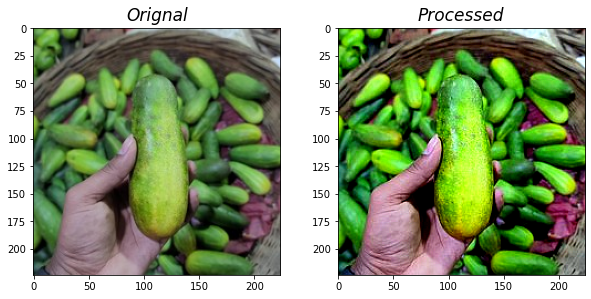

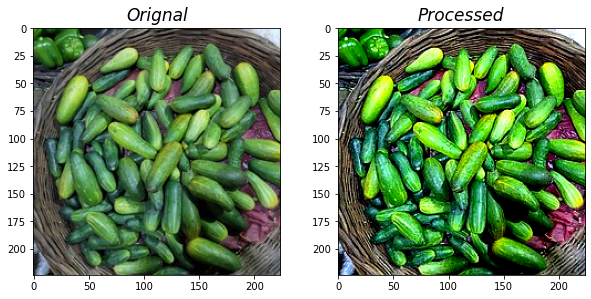

In [4]:
image_folder="Cucumber"  # The vegetable you want to display
number_of_images=2       # Number of images to display

def Preprocess():
    j=1
    for i in range(number_of_images):
    
        folder = os.path.join(test_folder,image_folder)
        a=random.choice(os.listdir(folder))

        image=Image.open(os.path.join(folder,a))
        image_duplicate=image.copy()
        plt.figure(figsize=(10,10))

        plt.subplot(number_of_images,2,j)
        plt.title(label='Orignal', size=17, pad='7.0', loc="center", fontstyle='italic')
        plt.imshow(image)
        j+=1

        image1=ImageEnhance.Color(image_duplicate).enhance(1.35)
        image1=ImageEnhance.Contrast(image1).enhance(1.45)
        image1=ImageEnhance.Sharpness(image1).enhance(2.5)
        
        plt.subplot(number_of_images,2,j)
        plt.title(label='Processed', size=17, pad='7.0', loc="center", fontstyle='italic')
        plt.imshow(image1)
        j+=1
        
Preprocess()

<h3> We increased the color saturation, contrast and finally sharpened the image for drawing texture and viewer focus. The image after processing looks appealing and brighter</h3>

# <span style="color:blue"><b> 3. Data Visualization (EDA)</b></span>
<hr>
<h2> We can start exploring the dataset and visualize any class label <i>(for instance, Capsicum)</i>. You can choose any vegetable to visualize the images of that class. Changing rows and columns variable also results in different format positioning of matplotlib. </h2>

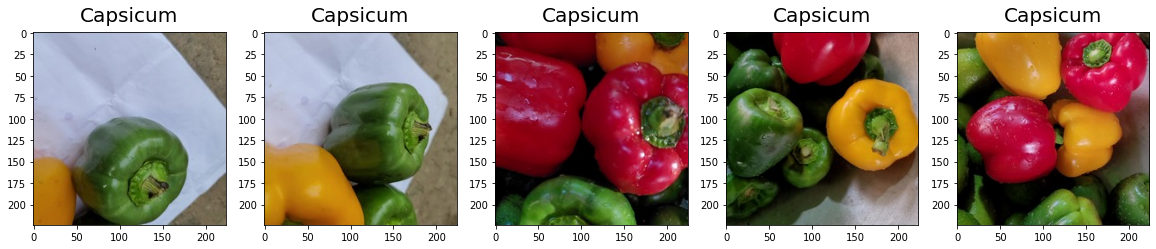

In [5]:
select_vegetable="Capsicum"
rows,columns = 1,5

display_folder=os.path.join(train_folder,select_vegetable)
total_images=rows*columns
fig=plt.figure(1, figsize=(20, 10))

for i,j in enumerate(os.listdir(display_folder)):      
    
    img = plt.imread(os.path.join(train_folder,select_vegetable,j))
    fig=plt.subplot(rows, columns, i+1)
    fig.set_title(select_vegetable, pad = 11, size=20)
    plt.imshow(img)
    
    if i==total_images-1:
        break

<h2> Now let's visualize the whole dataset by picking a random image from each class inside training dataset. </h2>

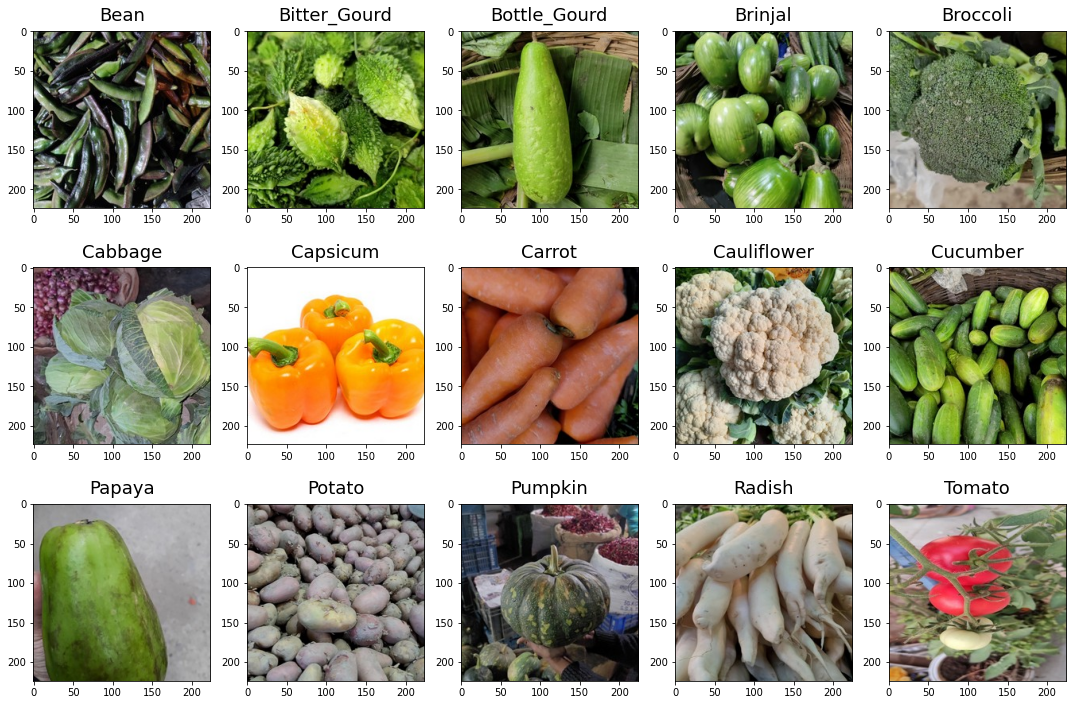

In [13]:
images = []

for food_folder in sorted(os.listdir(train_folder)):
    food_items = os.listdir(train_folder + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_folder,food_folder,food_selected))
                                     
fig=plt.figure(1, figsize=(15, 10))

for subplot, image_ in enumerate(images):
    category=image_.split('\\')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(3, 5, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)
    
plt.tight_layout()